In [1]:
# Import your dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
vaccine_df = pd.read_csv("Resources/vaccine_hesitancy_clean.csv")
vaccine_df.count()

percent_hispanic                                        3142
percent_non_hispanic_american_indianalaska_native       3142
percent_non_hispanic_asian                              3142
percent_non_hispanic_black                              3142
percent_non_hispanic_native_hawaiianpacific_islander    3142
percent_non_hispanic_white                              3142
social_vulnerability_index                              3142
cvac_level_of_concern_for_vaccination_rollout           3142
estimated_hesitant                                      3142
dtype: int64

In [3]:
# Split dataset into X and y values
X = vaccine_df.drop(columns = ['estimated_hesitant'], axis = 1)
y = vaccine_df['estimated_hesitant']

In [4]:
# Split data into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
# Fit the model 
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [7]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3059660555298932
Testing Score: 0.31419623063480306


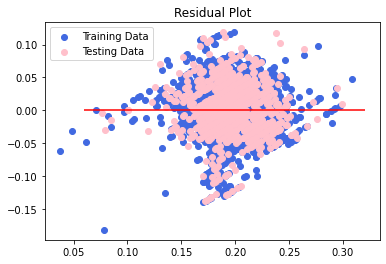

In [8]:
# Plot the training and testing data 
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="royalblue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors="red")
plt.title("Residual Plot")
plt.show()

In [9]:
# Regression metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
y_pred = model.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R Squared Score: ", r2_score(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

Mean Absolute Error:  0.02894297290935834
Mean Squared Error:  0.001434984901516746
R Squared Score:  0.31419623063480306
Explained Variance Score:  0.31527766173911265


In [10]:
# Export data for visualizations
multiple_linear_regression_mlen = pd.DataFrame(X_test)
multiple_linear_regression_mlen['actual_y'] = y_test
multiple_linear_regression_mlen['predict_y']= y_pred
multiple_linear_regression_mlen.to_csv('Resources/multiple_linear_regression_mlen.csv')